# Tugas 05 — Klasifikasi Iris dengan Decision Tree

**Tujuan:** Menggunakan dataset Iris untuk klasifikasi `Species`.


**Langkah:** mount Google Drive → load dataset → split 80/20 → latih Decision Tree → evaluasi → visualisasi.

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Konfigurasi path (ubah sesuai struktur Drive Anda)
# File path di Drive (pastikan file ada di lokasi ini)
FILE_PATH = "/content/gdrive/MyDrive/praktikum_ml/praktikum05/data/Iris.csv"

In [3]:
# Import libraries & Load dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# --- Load CSV ---
try:
    df = pd.read_csv(FILE_PATH)
except Exception as e:
    raise RuntimeError(f"Gagal baca CSV: {e}")

# Quick inspect
print("Dataset shape:", df.shape)
display(df.head())
display(df.describe(include='all'))

Dataset shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


**Catatan:** Pastikan kolom target bernama `Species`. Jika dataset punya kolom `Id`, kita akan membuangnya saat membuat X.

In [4]:
# Siapkan fitur (X) dan target (y)
# Jika kolom 'Id' ada, buang. Target = 'Species'
df_columns = df.columns.tolist()
if "Species" not in df_columns:
    raise RuntimeError("Kolom 'Species' tidak ditemukan. Periksa nama kolom di CSV.")

X = df.drop(columns=[c for c in ["Id","Species"] if c in df.columns])
y = df["Species"]

print("Fitur:", X.columns.tolist())
print("Jumlah kelas target:", y.nunique())

Fitur: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Jumlah kelas target: 3


In [5]:
# Split data 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (120, 4) Test shape: (30, 4)


In [6]:
# Buat model Decision Tree, latih, dan prediksi
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
# Evaluasi model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9333

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


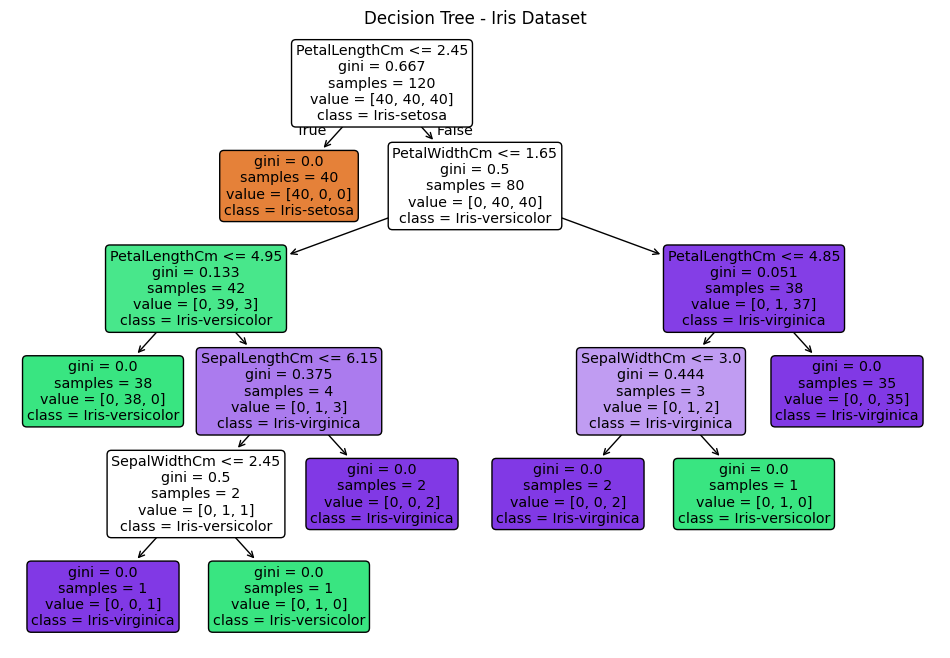

In [8]:
# Visualisasi pohon keputusan
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.title("Decision Tree - Iris Dataset")
plt.show()

In [9]:
# Tampilkan contoh prediksi (Actual vs Predicted)
result_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
display(result_df.reset_index(drop=True).head(10))

,Actual,Predicted
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-setosa,Iris-setosa
5,Iris-versicolor,Iris-versicolor
6,Iris-setosa,Iris-setosa
7,Iris-setosa,Iris-setosa
8,Iris-virginica,Iris-virginica
9,Iris-versicolor,Iris-versicolor


In [10]:
# Simpan model ke Drive (pickle)
import pickle
MODEL_PATH = "/content/gdrive/MyDrive/praktikum_ml/praktikum05/model/decision_tree_iris.pkl"

with open(MODEL_PATH, "wb") as f:
    pickle.dump(model, f)
print("Model tersimpan di:", MODEL_PATH)

Model tersimpan di: /content/gdrive/MyDrive/praktikum_ml/praktikum05/model/decision_tree_iris.pkl
